Vista del Dataset: 
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
Informacion del Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None
Cuales son los datos nulos: 
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
Los datos del entrenamiento son:  (160, 3)  y los datos de prueba son:  (40, 3)
Las primeras predicciones son:
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.3455

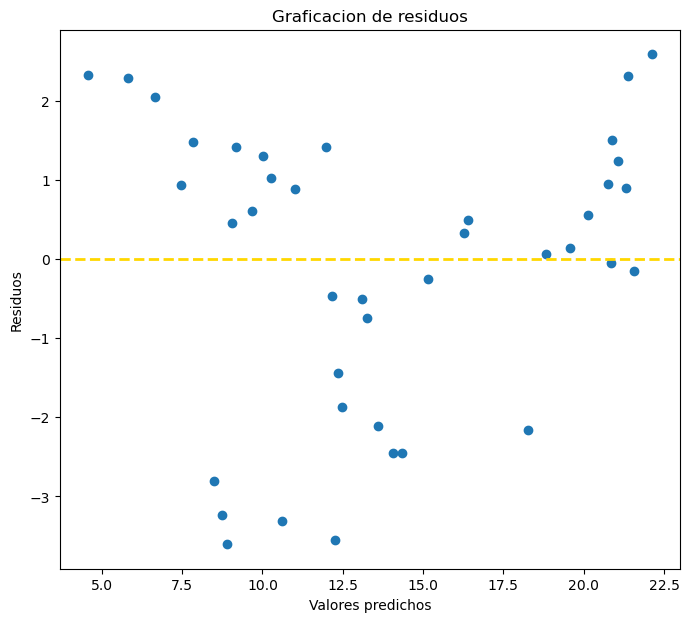

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, index_col = 0)

print("Vista del Dataset: ")
print(df.head())

print("Informacion del Dataset:")
print(df.info())

# 1.-Inputacio de datos
print("Cuales son los datos nulos: ")
print(df.isnull().sum())

# 2.- Division de conjuntos
x = df.drop("sales", axis = 1)
y = df["sales"]
#3.- Empezamos a entrenar a la maquina
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Los datos del entrenamiento son: ", x_train.shape, " y los datos de prueba son: ", x_test.shape)

#4.- Escalamiento de los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#5.- Entranamos al modelo ya que los datos ya estan preparados
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#6.-Prediccion de los datos de prueba
y_pred = model.predict(x_test_scaled)
print("Las primeras predicciones son:")
print(y_pred[:15])

#7.- Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

print("Vamos a evaluar el modelo:")
print("Error cuadratico medio (MSE):", mse)
print("Raiz del error cuadratico medio (RMSE):", rmse)
print("Coeficiente de determinacion (R2):", r2)
print("Erro absoluto medio (MAE):", mae)

#8.- Graficacion de los residuos
residuos = y_test - y_pred
plt.figure(figsize=(8, 7))
plt.scatter ( y_pred, residuos)
plt.axhline(y = 0 , color = "gold", linestyle = "--", linewidth = 2)
plt.title("Graficacion de residuos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.show()